# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Setup places to store results
df = pd.DataFrame(cities,columns =['City']) 
df["City Number"] = ""
df["City Name"] = ""
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Humidity"] = ""
df["Cloudiness"] = ""
df["Wind Speed"] = ""
df["Country"] = ""
df["Date"] = ""

In [4]:
# Perform a weather check on each city using a series of successive API calls.


for index, row in df.iterrows():
    
    # Save config information
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    city = row['City']
           
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # make request
    response = requests.get(query_url).json()
    
# Include a print log of each city as it'sbeing processed (with the city number and city name).
    try:
        df.loc[index, 'City Number'] = response["id"]
        df.loc[index, 'City Name'] = response["name"]
        df.loc[index, 'Lat'] = response["coord"]["lat"]
        df.loc[index, 'Lng'] = response["coord"]["lon"]
        df.loc[index, 'Max Temp'] = response["main"]["temp_max"]
        df.loc[index, 'Humidity'] = response["main"]["humidity"]
        df.loc[index, 'Cloudiness'] = response["clouds"]["all"]
        df.loc[index, 'Wind Speed'] = response["wind"]["speed"]
        df.loc[index, 'Country'] = response["sys"]["country"]
        df.loc[index, 'Date'] = response["dt"]

        
        print(f"Processing Record {index} of Set 1 | {row['City']}")
        
    except (KeyError, IndexError):
        print(f"City not found. Skipping...{index}.")
#         df.drop(city)
                

Processing Record 0 of Set 1 | bredasdorp
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | port macquarie
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | grand-santi
City not found. Skipping...12.
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | ulaanbaatar
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | grand gaube
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | fort-shevchenko
Processing Record 19 of Set 1 | aklavik
Processing Record 20 of Set 1 | kelo
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | luderitz
Processing Record 23 of Set 1 | luan
Processing Record

Processing Record 200 of Set 1 | jiazi
Processing Record 201 of Set 1 | galle
Processing Record 202 of Set 1 | byron bay
Processing Record 203 of Set 1 | nigde
Processing Record 204 of Set 1 | vertou
Processing Record 205 of Set 1 | praia da vitoria
Processing Record 206 of Set 1 | cardoso
Processing Record 207 of Set 1 | varca
Processing Record 208 of Set 1 | sisimiut
City not found. Skipping...209.
Processing Record 210 of Set 1 | kavaratti
Processing Record 211 of Set 1 | nantucket
Processing Record 212 of Set 1 | launceston
Processing Record 213 of Set 1 | henties bay
Processing Record 214 of Set 1 | nebbi
City not found. Skipping...215.
Processing Record 216 of Set 1 | dekar
Processing Record 217 of Set 1 | jackson
Processing Record 218 of Set 1 | horsham
Processing Record 219 of Set 1 | namibe
Processing Record 220 of Set 1 | umm lajj
Processing Record 221 of Set 1 | chenghai
Processing Record 222 of Set 1 | georgetown
Processing Record 223 of Set 1 | namatanai
Processing Record 

Processing Record 398 of Set 1 | romodanovo
Processing Record 399 of Set 1 | praia
Processing Record 400 of Set 1 | rivera
Processing Record 401 of Set 1 | biggar
Processing Record 402 of Set 1 | fare
Processing Record 403 of Set 1 | bethel
Processing Record 404 of Set 1 | uarini
Processing Record 405 of Set 1 | klamath falls
Processing Record 406 of Set 1 | anlu
Processing Record 407 of Set 1 | edson
Processing Record 408 of Set 1 | ahuimanu
Processing Record 409 of Set 1 | mabaruma
Processing Record 410 of Set 1 | guerrero negro
Processing Record 411 of Set 1 | sabang
Processing Record 412 of Set 1 | leh
Processing Record 413 of Set 1 | yokadouma
Processing Record 414 of Set 1 | flinders
Processing Record 415 of Set 1 | sao filipe
Processing Record 416 of Set 1 | chiredzi
Processing Record 417 of Set 1 | sovetskiy
Processing Record 418 of Set 1 | pasighat
Processing Record 419 of Set 1 | balkhash
Processing Record 420 of Set 1 | mgandu
Processing Record 421 of Set 1 | trybukhivtsi
Pr

Processing Record 594 of Set 1 | husavik
Processing Record 595 of Set 1 | halifax
Processing Record 596 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 597 of Set 1 | nkhotakota
Processing Record 598 of Set 1 | mana
City not found. Skipping...599.
Processing Record 600 of Set 1 | olafsvik
Processing Record 601 of Set 1 | abu kamal
Processing Record 602 of Set 1 | dunedin
Processing Record 603 of Set 1 | eureka
Processing Record 604 of Set 1 | manasa
Processing Record 605 of Set 1 | verkhnevilyuysk
Processing Record 606 of Set 1 | mizan teferi
Processing Record 607 of Set 1 | kibala
Processing Record 608 of Set 1 | norden
Processing Record 609 of Set 1 | kosonsoy
Processing Record 610 of Set 1 | arkadak
Processing Record 611 of Set 1 | canon city
Processing Record 612 of Set 1 | nykoping
Processing Record 613 of Set 1 | nizwa
Processing Record 614 of Set 1 | wanning
Processing Record 615 of Set 1 | chitrakonda
Processing Record 616 of Set 1 | bairiki
Processing Record 617 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Export Data to csv
df.to_csv(output_data_file)

In [6]:
#Display DataFrame
cities_df = df[df['Max Temp'] != ""]

cities_df.set_index(["City"])

cities_df["Lat"] = cities_df["Lat"].astype(float)
cities_df["Lng"] = cities_df["Lng"].astype(float)
cities_df["Max Temp"] = cities_df["Max Temp"].astype(float)
cities_df["Humidity"] = cities_df["Humidity"].astype(float)
cities_df["Cloudiness"] = cities_df["Cloudiness"].astype(float)
cities_df["Wind Speed"] = cities_df["Wind Speed"].astype(float)
cities_df["Date"] = cities_df["Date"].astype(float)

cities_df.count()

C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\tawnyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

City           593
City Number    593
City Name      593
Lat            593
Lng            593
Max Temp       593
Humidity       593
Cloudiness     593
Wind Speed     593
Country        593
Date           593
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Skip this step if there are no cities that have humidity > 100%.
humidity_cities_df = cities_df[cities_df["Humidity"] > 100]

In [8]:
# describe numeric values
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,5.930000e+02
mean,18.929494,23.331737,68.395852,72.133221,49.148398,7.855599,1.597106e+09
std,33.301856,88.129893,13.496402,19.966800,39.581061,5.352132,6.476002e+01
min,-54.800000,-179.170000,32.000000,1.000000,0.000000,0.600000,1.597105e+09
25%,-8.930000,-52.950000,57.810000,63.000000,4.000000,3.670000,1.597106e+09
50%,20.890000,27.250000,70.230000,77.000000,50.000000,6.710000,1.597106e+09
75%,47.170000,100.950000,78.820000,87.000000,90.000000,11.010000,1.597106e+09
max,78.220000,179.320000,102.000000,100.000000,100.000000,32.440000,1.597106e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_cities_df.index

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(humidity_cities_df.index, inplace=False)
clean_city_data

,City,City Number,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,1015776,Bredasdorp,-34.53,20.04,42.80,93.0,0.0,3.36,ZA,1.597106e+09
1,mataura,6201424,Mataura,-46.19,168.86,52.00,74.0,73.0,10.00,NZ,1.597106e+09
2,port macquarie,2152659,Port Macquarie,-31.43,152.92,61.00,73.0,68.0,1.99,AU,1.597106e+09
3,ancud,3899695,Ancud,-41.87,-73.82,42.01,93.0,20.0,4.70,CL,1.597106e+09
4,san patricio,3985168,San Patricio,19.22,-104.70,86.00,74.0,75.0,11.41,MX,1.597106e+09
...,...,...,...,...,...,...,...,...,...,...,...
633,rawson,3839307,Rawson,-43.30,-65.10,43.56,55.0,0.0,22.50,AR,1.597106e+09
634,mitsamiouli,921786,Mitsamiouli,-11.38,43.28,74.55,75.0,0.0,9.10,KM,1.597106e+09
636,ialibu,2095925,Ialibu,-6.28,143.99,65.64,86.0,22.0,2.62,PG,1.597106e+09
637,kodinsk,1503037,Kodinsk,58.69,99.18,73.11,50.0,69.0,1.77,RU,1.597106e+09


In [11]:
# Extract relevant fields from the data frame
plot_data = clean_city_data[["City Name","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country"]]


# Export the City_Data into a csv
plot_data.to_csv("output_data/city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

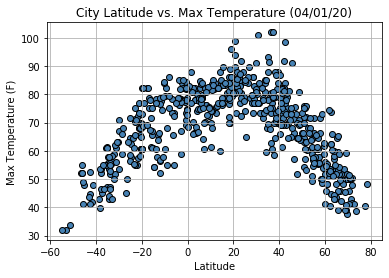

<Figure size 432x288 with 0 Axes>

In [12]:
# Create Plot
x_axis = plot_data["Lat"]
y_axis = plot_data["Max Temp"]

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue', edgecolors='black', linewidth=1)
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.show()

plt.savefig("output_data\Lat_vs_Temp.png")

## Latitude vs. Humidity Plot

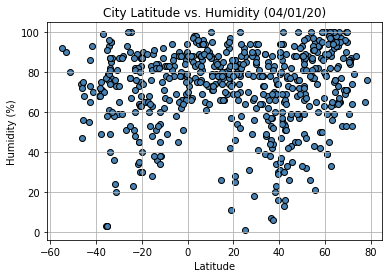

<Figure size 432x288 with 0 Axes>

In [13]:
# Create Plot
x_axis = plot_data["Lat"]
y_axis = plot_data["Humidity"]

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue', edgecolors='black', linewidth=1)
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()
plt.savefig("output_data\Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

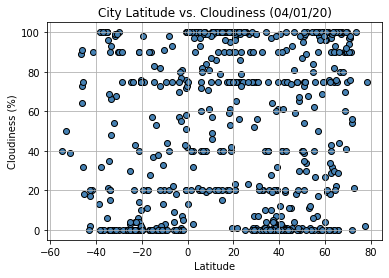

<Figure size 432x288 with 0 Axes>

In [14]:
# Create Plot
x_axis = plot_data["Lat"]
y_axis = plot_data["Cloudiness"] 

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue', edgecolors='black', linewidth=1)
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()
plt.savefig("output_data\Lat_vs_Clouds.png")

## Latitude vs. Wind Speed Plot

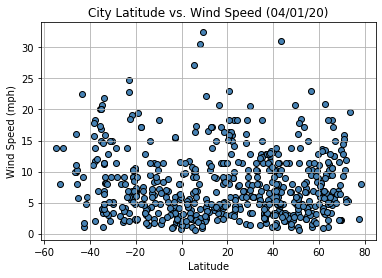

<Figure size 432x288 with 0 Axes>

In [15]:
# Create Plot
x_axis = plot_data["Lat"]
y_axis = plot_data["Wind Speed"]

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue', edgecolors='black', linewidth=1)
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()
plt.savefig("output_data\Lat_vs_Wind.png")

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
northern_hemisphere = plot_data.loc[plot_data['Lat'] > 0]
southern_hemisphere = plot_data.loc[plot_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.003753700310159753


ValueError: x and y must have same first dimension, but have shapes (405,) and (593,)

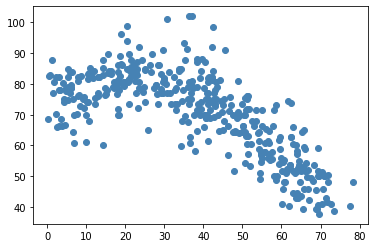

In [17]:
# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Max Temp"]

print(f'The r-squared is: {rvalue**2}')

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
# plt.savefig("output_data\North_Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Max Temp"]

print(f'The r-squared is: {rvalue**2}')

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
plt.savefig("output_data\South_Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Humidity"]

print(f'The r-squared is: {rvalue**2}')

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("output_data\North_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Humidity"]

print(f'The r-squared is: {rvalue**2}')

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
plt.savefig("output_data\South_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Cloudiness"]

print(f'The r-squared is: {rvalue**2}')

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("output_data\North_Cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Cloudiness"]

print(f'The r-squared is: {rvalue**2}')

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig("output_data\South_Cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Wind Speed"]  

print(f'The r-squared is: {rvalue**2}')

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (50,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("output_data\North_Cloud.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Get regression values
regress_values = x_axis * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Wind Speed"]  

print(f'The r-squared is: {rvalue**2}')

fig, ax = plt.subplots()
ax.scatter(x_axis,y_axis, c='steelblue')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-50,15), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig("output_data\South_Wind.png")